In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [3]:
site_data_path = "/u/dem/kebl6911/Part-II/MASH_optimization/Data/mash_site300K.dat"
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=12)

t_1 = 700, t_2 = 1000

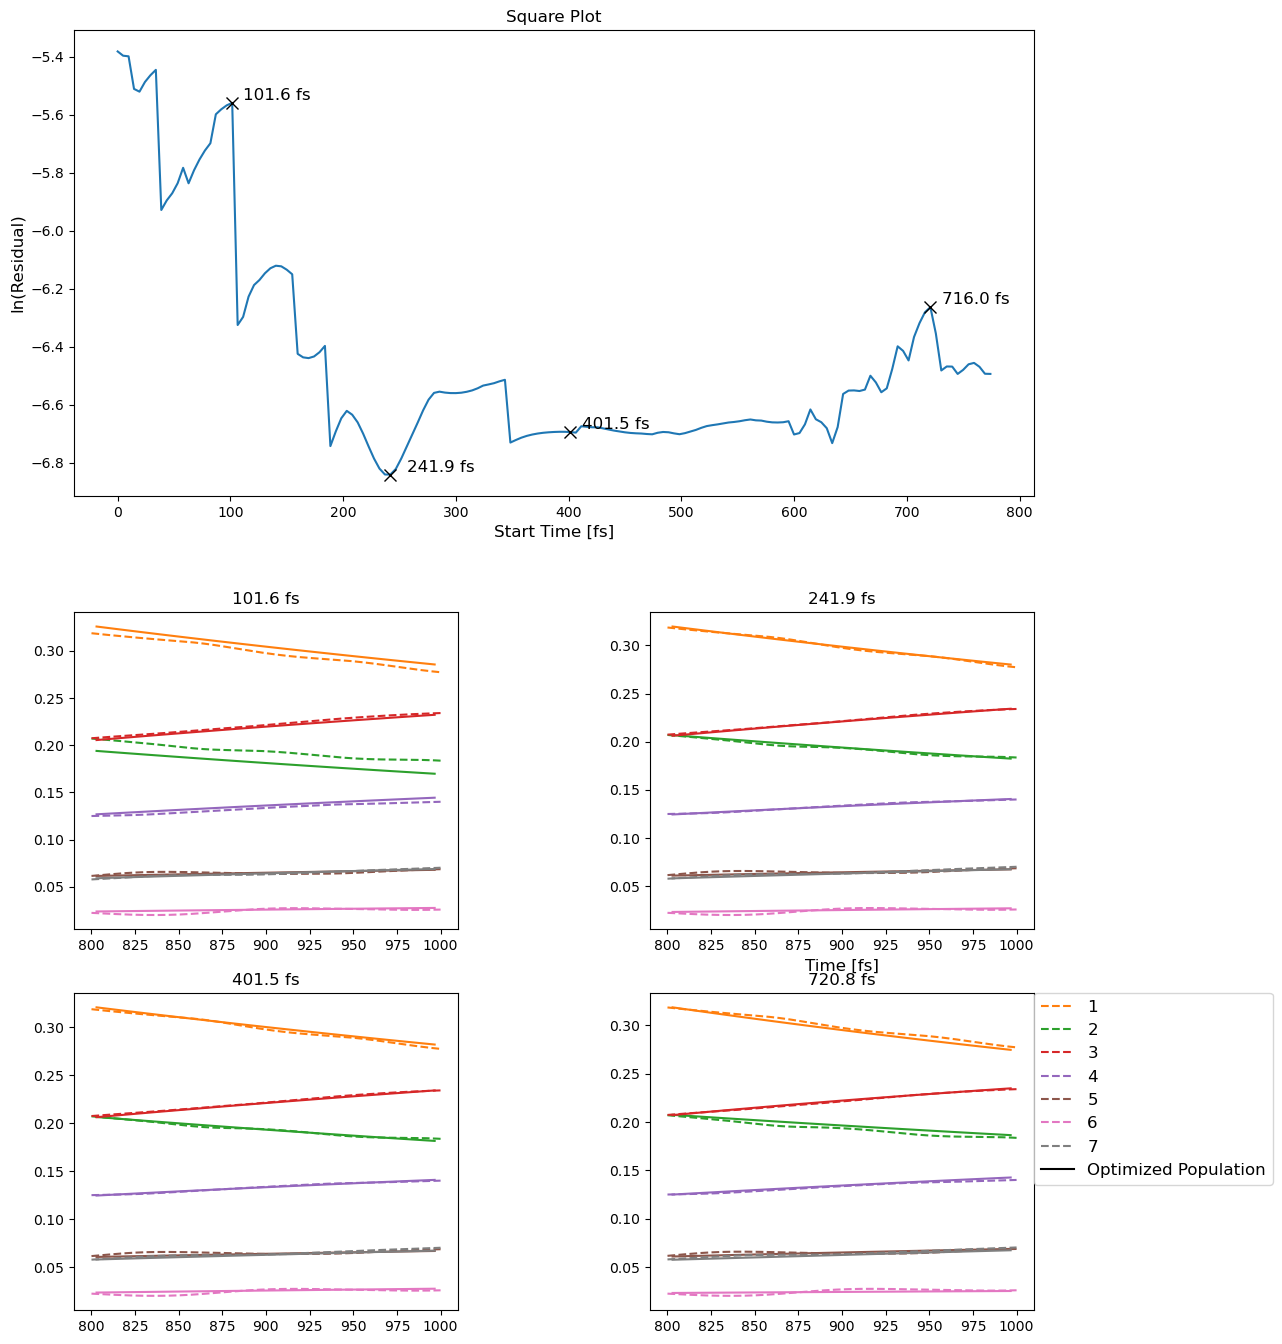

In [4]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/site_residual.dat")
site_data = site_data[site_data[:,0] <= 1000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 6])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(site_residual_data[:,0],np.log(site_residual_data[:,1]))
ax0.set_title('Square Plot')
ax0.set_ylabel('ln(Residual)')
ax0.set_xlabel('Start Time [fs]')

ax0.plot(site_residual_data[21,0], np.log(site_residual_data[21,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, np.log(site_residual_data[21,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[50,0], np.log(site_residual_data[50,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[50,0]+15, np.log(site_residual_data[50,1]), '241.9 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[83,0], np.log(site_residual_data[83,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[83,0]+10, np.log(site_residual_data[83,1]), '401.5 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[149,0], np.log(site_residual_data[149,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[149,0]+10, np.log(site_residual_data[149,1]), '716.0 fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
ax4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title('101.6 fs')

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site/241.88851068276415_51.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title('241.9 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site/401.5349277333885_84.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title('401.5 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site/720.8277618346372_150.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax4.set_title('720.8 fs')
ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

# ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
# custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')


# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()



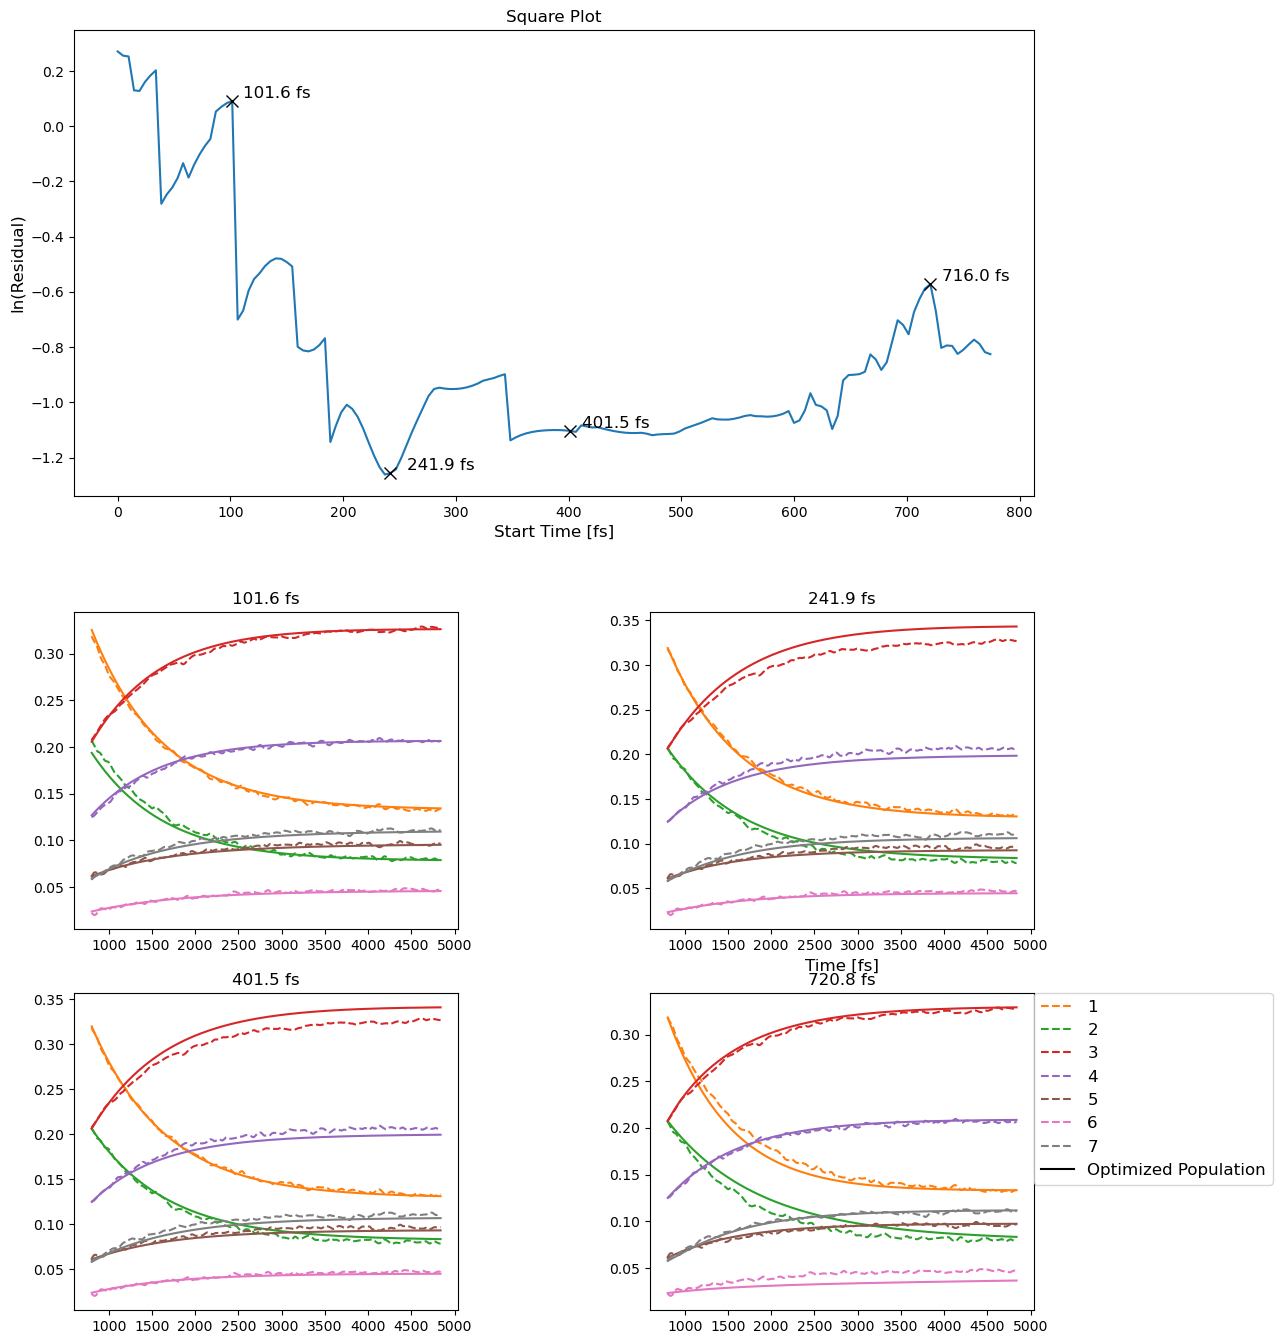

In [5]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/site_residual1.dat")
site_data = site_data[site_data[:,0] <= 5000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 6])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(site_residual_data[:,0],np.log(site_residual_data[:,1]))
ax0.set_title('Square Plot')
ax0.set_ylabel('ln(Residual)')
ax0.set_xlabel('Start Time [fs]')

ax0.plot(site_residual_data[21,0], np.log(site_residual_data[21,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, np.log(site_residual_data[21,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[50,0], np.log(site_residual_data[50,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[50,0]+15, np.log(site_residual_data[50,1]), '241.9 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[83,0], np.log(site_residual_data[83,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[83,0]+10, np.log(site_residual_data[83,1]), '401.5 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[149,0], np.log(site_residual_data[149,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[149,0]+10, np.log(site_residual_data[149,1]), '716.0 fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
ax4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title('101.6 fs')

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/241.88851068276415_51.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title('241.9 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/401.5349277333885_84.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title('401.5 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/720.8277618346372_150.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax4.set_title('720.8 fs')
ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

# ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
# custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')


# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

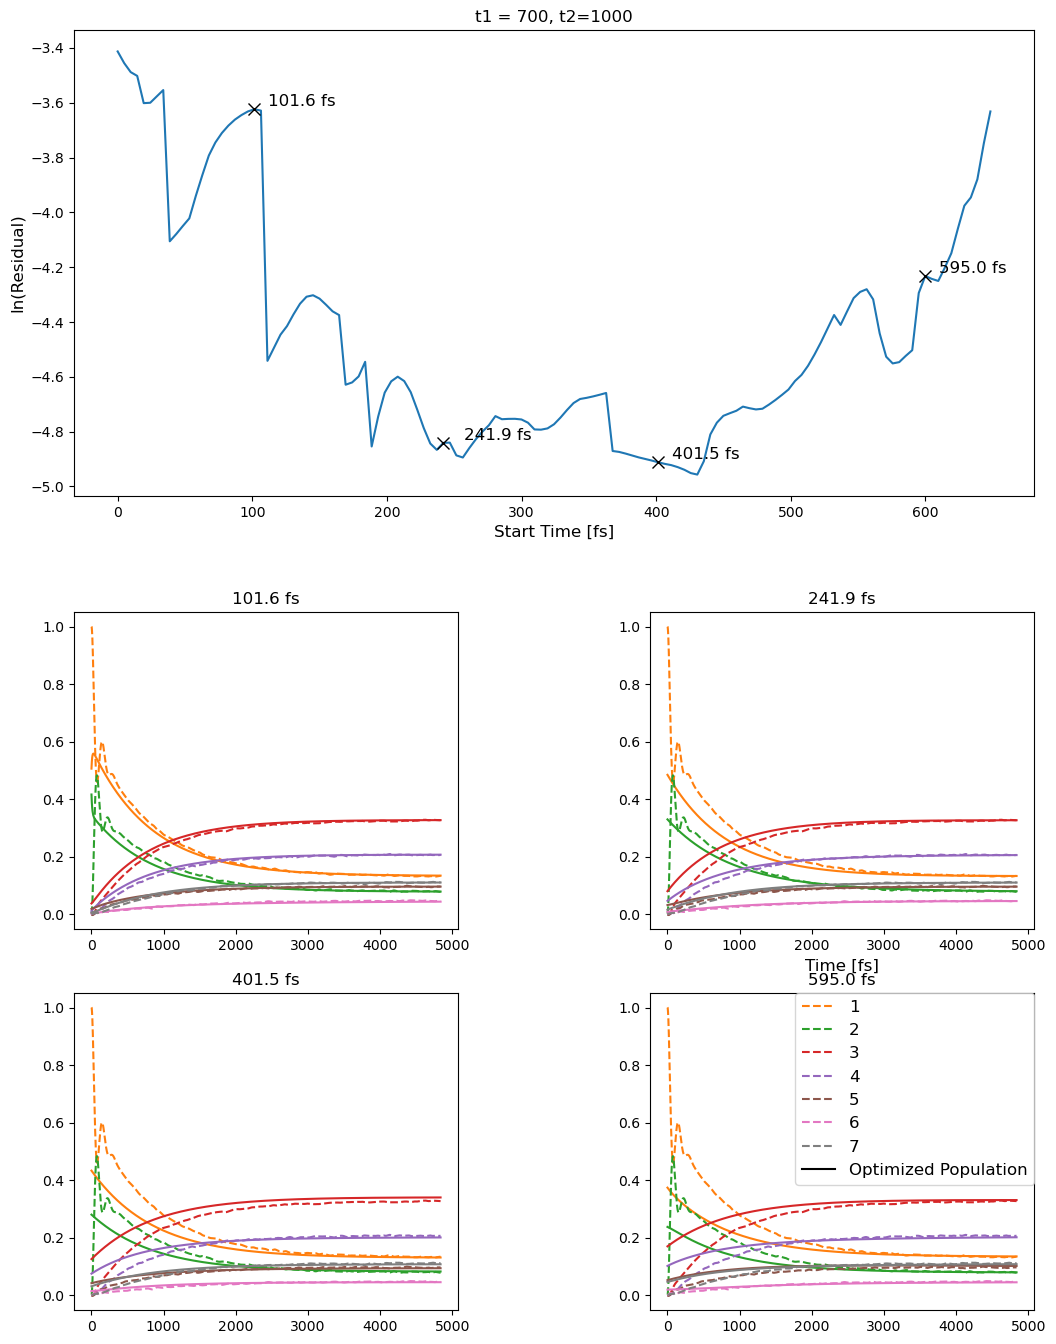

In [9]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/700_1000_resid.dat")
site_data = site_data[site_data[:,0] <= 5000]
# site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 6])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(site_residual_data[:,0],np.log(site_residual_data[:,1]))
ax0.set_title('t1 = 700, t2=1000')
ax0.set_ylabel('ln(Residual)')
ax0.set_xlabel('Start Time [fs]')

ax0.plot(site_residual_data[21,0], np.log(site_residual_data[21,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, np.log(site_residual_data[21,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[50,0], np.log(site_residual_data[50,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[50,0]+15, np.log(site_residual_data[50,1]), '241.9 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[83,0], np.log(site_residual_data[83,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[83,0]+10, np.log(site_residual_data[83,1]), '401.5 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[124,0], np.log(site_residual_data[124,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[124,0]+10, np.log(site_residual_data[124,1]), '595.0 fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
ax4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_700_t2_1000/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title('101.6 fs')

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_700_t2_1000/241.88851068276415_51.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title('241.9 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_700_t2_1000/401.5349277333885_84.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title('401.5 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_700_t2_1000/595.0457362796_124.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax4.set_title('595.0 fs')
ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

# ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
# custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')


# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

t1=1000, t2=1300

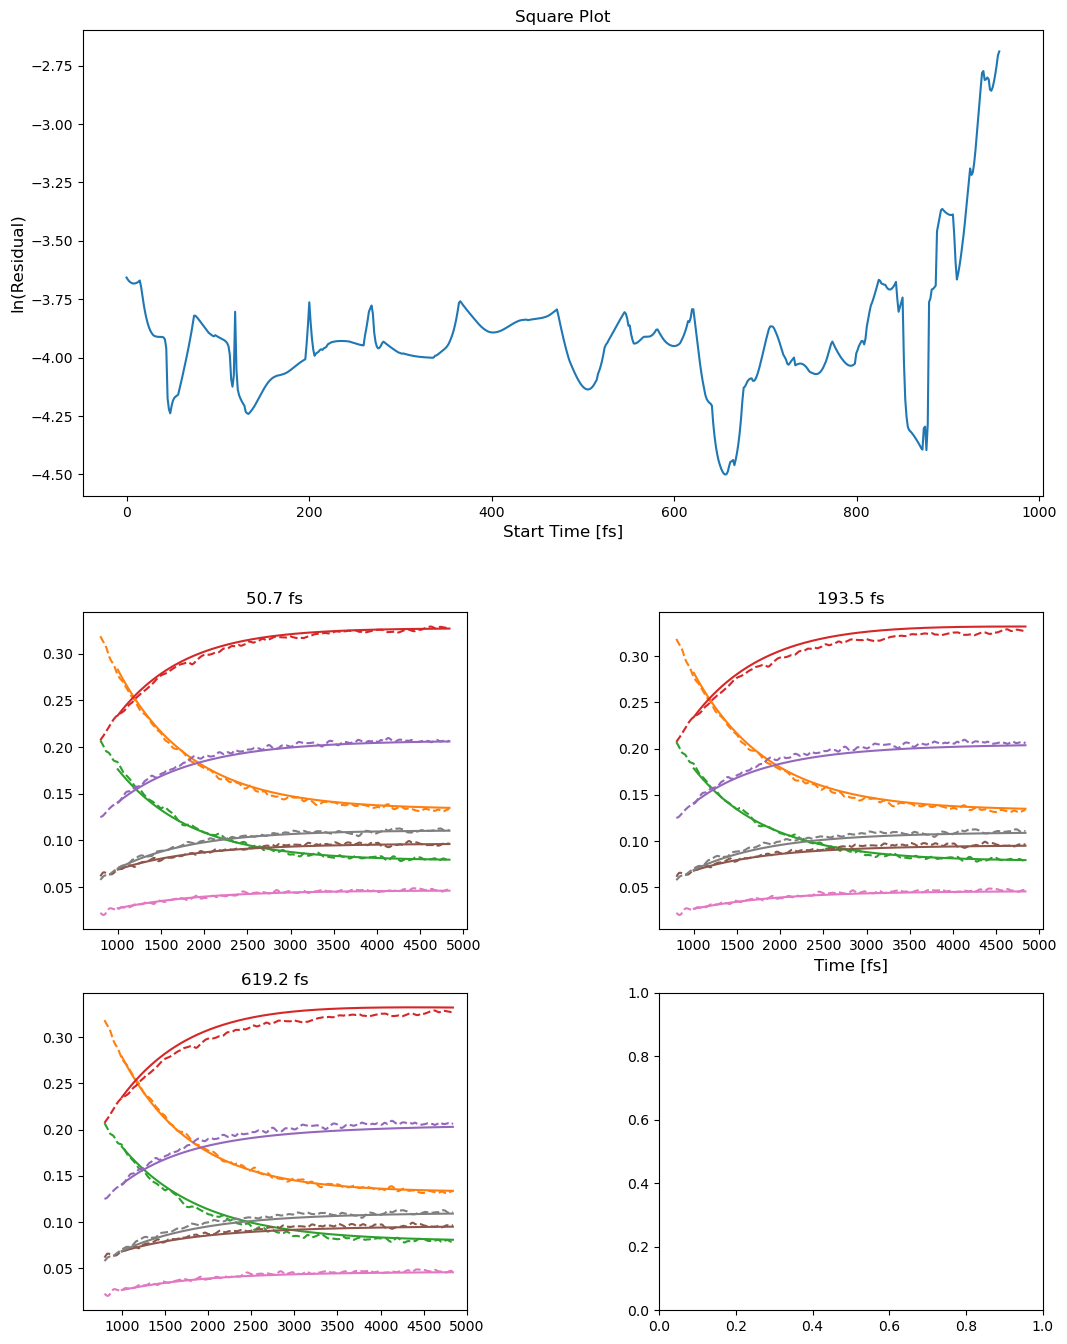

In [6]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/site_residual5.dat")
#site_data = site_data[site_data[:,0] <= 1000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 6])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(site_residual_data[:,0],np.log(site_residual_data[:,1]))
ax0.set_title('Square Plot')
ax0.set_ylabel('ln(Residual)')
ax0.set_xlabel('Start Time [fs]')

# ax0.plot(site_residual_data[21,0], np.log(site_residual_data[21,1]), 'x', markersize=8, color = 'black')
# ax0.text(site_residual_data[21,0]+10, np.log(site_residual_data[21,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

# ax0.plot(site_residual_data[50,0], np.log(site_residual_data[50,1]), 'x', markersize=8, color = 'black')
# ax0.text(site_residual_data[50,0]+15, np.log(site_residual_data[50,1]), '241.9 fs', fontsize=12, ha='left', va='bottom', color='black')

# ax0.plot(site_residual_data[83,0], np.log(site_residual_data[83,1]), 'x', markersize=8, color = 'black')
# ax0.text(site_residual_data[83,0]+10, np.log(site_residual_data[83,1]), '401.5 fs', fontsize=12, ha='left', va='bottom', color='black')

# ax0.plot(site_residual_data[106,0], np.log(site_residual_data[106,1]), 'x', markersize=8, color = 'black')
# ax0.text(site_residual_data[106,0]+10, np.log(site_residual_data[106,1]), '716.0 fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
ax4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site5/50.79658724338048_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title('50.7 fs')

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site5/193.5108085462113_81.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title('193.5 fs')

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site5/619.2345873478762_257.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title('619.2 fs')
ax3.set_xlim(550,5000)
# data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site5/522.4791830747705_109.dat")
# for i, column_name in enumerate(column_names[1:], start=1):
#     c = "C%i"%i
#     ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
#     ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

# ax4.set_title('512.8 fs')
# ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)
# ax4.set_xlim(550,1000)
# ax4.set_ylim
# # ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
# # custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')


# # Define custom legend entries for dotted lines
# dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# # Add the custom legend entries to the legend
# legend_handles, legend_labels = ax3.get_legend_handles_labels()
# legend_handles.append(dotted_legend_entry)
# legend_labels.append('Optimized Population')
# ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

t1=700, t2=1300

[0.1332658  0.07835351 0.32700964 0.20708842 0.09665133 0.04663944
 0.11099185]


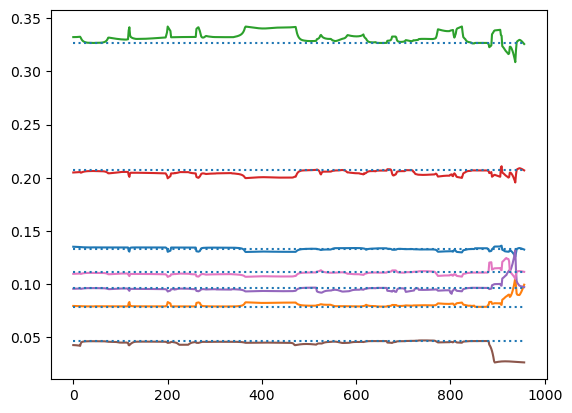

In [7]:
data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/final_pop.dat")
for i in range(1,8):
    plt.plot(data[:,0],data[:,i], "-")

site_data_eq = site_data[-1][1:8]
for i in range(len(site_data_eq)):
    plt.hlines(xmin=data[:, 0].min(), xmax=data[:, 0].max(),y=site_data_eq[i], linestyle=":")
print(site_data_eq)

plt.show()
